# Modelling

Modelling the data with Regression models and evaluating them.

In [40]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# loading the dataset
data = pd.read_csv("/content/final_preprocessed_data.csv")
data

,Unnamed: 0,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Start Year,Total Deaths,Total Affected,CPI,magnitude_degree_celcius,magnitude_km_square,magnitude_richter,magnitude_kph
0,1088,Meteorological,Extreme temperature,Cold wave,IND,India,Southern Asia,1981,300.0,30000.0,13.112547,-1.0,0.000,0.0,0.0
1,1089,Hydrological,Flood,Flood (General),PHL,Philippines,South-eastern Asia,1981,228.0,300000.0,13.082599,0.0,28897.025,0.0,0.0
2,1091,Geophysical,Earthquake,Ground movement,IDN,Indonesia,South-eastern Asia,1981,306.0,2682.0,12.265909,0.0,0.000,6.8,0.0
3,1093,Hydrological,Flood,Flood (General),YMD,People's Democratic Republic of Yemen,Western Asia,1981,17.0,12000.0,29.840662,0.0,28897.025,0.0,0.0
4,1095,Climatological,Wildfire,Forest fire,MMR,Myanmar,South-eastern Asia,1981,8.0,48588.0,0.318445,0.0,100.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4343,6246,Hydrological,Flood,Flood (General),IDN,Indonesia,South-eastern Asia,2022,1.0,3210.0,4.209464,0.0,28897.025,0.0,0.0
4344,6247,Climatological,Drought,Drought,CHN,China,Eastern Asia,2022,138.5,6100000.0,1.973576,0.0,6745.500,0.0,0.0
4345,6304,Meteorological,Storm,Tropical cyclone,TWN,Taiwan (Province of China),Eastern Asia,2023,1.0,40026.0,100.000000,0.0,0.000,0.0,150.0
4346,6340,Meteorological,Storm,Tropical cyclone,TWN,Taiwan (Province of China),Eastern Asia,2023,1.0,40026.0,100.000000,0.0,0.000,0.0,150.0


In [42]:
# dropping the unnecessary columns
data = data.drop(['Unnamed: 0'], axis=1)

In [43]:
data.dtypes

Disaster Subgroup            object
Disaster Type                object
Disaster Subtype             object
ISO                          object
Country                      object
Subregion                    object
Start Year                    int64
Total Deaths                float64
Total Affected              float64
CPI                         float64
magnitude_degree_celcius    float64
magnitude_km_square         float64
magnitude_richter           float64
magnitude_kph               float64
dtype: object

In [44]:
# Dropping country column
data.drop("Country", axis=1, inplace=True)

In [97]:
#saving the data as final data for modelling
data.to_csv("final_data_for_modelling.csv")

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestRegressor

X = data.drop("CPI", axis=1)
y = data["CPI"]

numerical_columns = X.select_dtypes(include=["float64","int64"]).columns
categorical_column = X.select_dtypes(include=["object"]).columns

# Creating a function to apply label encoder for each column
def label_encode(df):
  encoded_df = df.copy()
  for col in categorical_column:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(df[col])
  return encoded_df

# Creating numerical column transformers to transform the numerical columns to scaled data
numerical_transformer = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])

# Creating categorical column transformers to transform the categorical columns to label encoded data
categorical_transformer = Pipeline(steps=[
    ("label_encoder",FunctionTransformer(lambda x: label_encode(x), validate=False))
])

# Combining the transformers into a single preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer, numerical_columns),
        ("categorical", categorical_transformer, categorical_column)
    ], remainder="passthrough")


In [46]:
# Testing the preprocessing pipeline
preprocessed_data = pd.DataFrame(preprocessor.fit_transform(X), columns = numerical_columns.tolist() + categorical_column.tolist())
preprocessed_data

,Start Year,Total Deaths,Total Affected,magnitude_degree_celcius,magnitude_km_square,magnitude_richter,magnitude_kph,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Subregion
0,0.00000,0.001804,9.090606e-05,0.500000,0.000000,0.000000,0.000000,3.0,2.0,2.0,12.0,3.0
1,0.00000,0.001370,9.090879e-04,0.509259,0.010930,0.000000,0.000000,2.0,3.0,5.0,34.0,2.0
2,0.00000,0.001841,8.124242e-06,0.509259,0.000000,0.747253,0.000000,1.0,1.0,7.0,11.0,2.0
3,0.00000,0.000097,3.636061e-05,0.509259,0.010930,0.000000,0.000000,2.0,3.0,5.0,47.0,4.0
4,0.00000,0.000042,1.472333e-04,0.509259,0.000038,0.000000,0.000000,0.0,5.0,6.0,28.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4343,0.97619,0.000000,9.724242e-06,0.509259,0.010930,0.000000,0.000000,2.0,3.0,5.0,11.0,2.0
4344,0.97619,0.000830,1.848485e-02,0.509259,0.002551,0.000000,0.000000,0.0,0.0,3.0,7.0,1.0
4345,1.00000,0.000000,1.212879e-04,0.509259,0.000000,0.000000,0.005696,3.0,4.0,17.0,43.0,1.0
4346,1.00000,0.000000,1.212879e-04,0.509259,0.000000,0.000000,0.005696,3.0,4.0,17.0,43.0,1.0


In [47]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Creating a sample model pipeline
model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

#fittin the model pipeline with train data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Start Year', 'Total Deaths', 'Total Affected',
       'magnitude_degree_celcius', 'magnitude_km_square', 'magnitude_richter',
       'magnitude_kph'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('label_encoder',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7a9c6faa3910>))]),
                                                  Index(['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO',
       'Subregion'],
      dtype='object'))])),
                ('model', RandomForestRegressor())])

In [49]:
#making predictions
y_preds = model.predict(X_test)

In [50]:
#evaluating the predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error:", mean_absolute_error(y_test, y_preds))
print("Mean Squared Error:", mean_squared_error(y_test, y_preds))
print("R-squared:", r2_score(y_test, y_preds))

Mean Absolute Error: 14.20167063274061
Mean Squared Error: 3046.5584543972586
R-squared: -12.555220965189728


In [51]:
# replicating the preprocessing pipeline with standard scaler instead of minmax scaler
from sklearn.preprocessing import StandardScaler
numerical_transformer_standard = Pipeline(steps=[
    ("scaler", StandardScaler())
])

preprocessor_standard = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer_standard, numerical_columns),
        ("categorical", categorical_transformer, categorical_column)
    ], remainder="passthrough")

model_standard = Pipeline([
    ("preprocessor", preprocessor_standard),
    ("model", RandomForestRegressor())
])

model_standard.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Start Year', 'Total Deaths', 'Total Affected',
       'magnitude_degree_celcius', 'magnitude_km_square', 'magnitude_richter',
       'magnitude_kph'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('label_encoder',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7a9c6faa3910>))]),
                                                  Index(['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO',
       'Subregion'],
      dtype='object'))])),
                ('model', RandomForestRegressor())])

In [52]:
#making predictions
y_pred_standard = model_standard.predict(X_test)

#evaluating differrent metrics of regression on the predictions
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_standard))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_standard))
print("R-squared:", r2_score(y_test, y_pred_standard))

Mean Absolute Error: 14.362581049348499
Mean Squared Error: 3322.1584552118534
R-squared: -13.781463285817516


In [53]:
#replicating the preprocessing pipeline with robust scaler
from sklearn.preprocessing import RobustScaler

numerical_transformer_robust = Pipeline(steps=[
    ("scaler", RobustScaler())
])

processor_robust = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer_robust, numerical_columns),
        ("categorical", categorical_transformer, categorical_column)
    ], remainder="passthrough")

model_robust = Pipeline([
    ("preprocessor", processor_robust),
    ("model", RandomForestRegressor())
])

model_robust.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Start Year', 'Total Deaths', 'Total Affected',
       'magnitude_degree_celcius', 'magnitude_km_square', 'magnitude_richter',
       'magnitude_kph'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('label_encoder',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7a9c6faa3910>))]),
                                                  Index(['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO',
       'Subregion'],
      dtype='object'))])),
                ('model', RandomForestRegressor())])

In [54]:
#making predictions
y_pred_robust = model_robust.predict(X_test)

#evaluating differrent metrics of regression on the predictions
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_robust))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_robust))
print("R-squared:", r2_score(y_test, y_pred_robust))

Mean Absolute Error: 14.48084244267036
Mean Squared Error: 3292.2082078644075
R-squared: -13.648203994445396


The first pipeline with MinMax Scaler has compartively better results

## Creating a function to test out various regression models and evaluate them

In [56]:
# Import statements for regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Initializers for the regression models as a list
regression_models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor(),
    XGBRegressor()
]


In [57]:
# creating a function to get rmse
def get_rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

In [74]:


def evaluate_regression_models(X, y):
  """
  Apply regression models to the given data and evaluate their performance.

  Args:
    X (pandas.DataFrame): Input features.
    y (pandas.Series): Target variable.
  Returns:
    pandas.DataFrame: DataFrame containing model metrics.
    list: List of trained regression models.
  """

  #initializing a dictionary to store model metrics

  #splititng to train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model_metrics = {}
  models = {} # dictionary of model pipelines
  for model in regression_models:
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    rmse = get_rmse(y_test, y_pred)
    metric = dict()
    metric["mse"] = mean_squared_error(y_test, y_pred)
    metric["rmse"] = rmse
    metric["mae"] = mean_absolute_error(y_test, y_pred)
    metric["r2"] = r2_score(y_test, y_pred)
    model_metrics[model.__class__.__name__] = metric
    models[model.__class__.__name__]=model_pipeline

  model_metrics_df = pd.DataFrame(model_metrics).T
  return model_metrics_df, models


In [75]:
results , models = evaluate_regression_models(X, y)

In [76]:
results

,mse,rmse,mae,r2
LinearRegression,200.092962,14.145422,6.979983,0.109715
Ridge,200.012302,14.142571,6.974428,0.110074
Lasso,213.390580,14.607894,7.305350,0.050549
ElasticNet,212.968738,14.593448,7.283291,0.052426
DecisionTreeRegressor,3722.155034,61.009467,15.247104,-15.561190
RandomForestRegressor,3015.467957,54.913277,14.025137,-12.416888
GradientBoostingRegressor,2534.245458,50.341290,17.130767,-10.275758
SVR,236.267152,15.370984,6.519163,-0.051236
KNeighborsRegressor,384.915238,19.619257,9.931331,-0.712625
XGBRegressor,3083.138683,55.526018,15.768095,-12.717979


In [77]:
#sorting the results by ascending order of mae
results.sort_values(by="mae")

,mse,rmse,mae,r2
SVR,236.267152,15.370984,6.519163,-0.051236
Ridge,200.012302,14.142571,6.974428,0.110074
LinearRegression,200.092962,14.145422,6.979983,0.109715
ElasticNet,212.968738,14.593448,7.283291,0.052426
Lasso,213.390580,14.607894,7.305350,0.050549
KNeighborsRegressor,384.915238,19.619257,9.931331,-0.712625
RandomForestRegressor,3015.467957,54.913277,14.025137,-12.416888
DecisionTreeRegressor,3722.155034,61.009467,15.247104,-15.561190
XGBRegressor,3083.138683,55.526018,15.768095,-12.717979
GradientBoostingRegressor,2534.245458,50.341290,17.130767,-10.275758


1. **SVR**, **Ridge** and **LinearRegression** regressors with default parameters are performing better in terms of Mean Absolute Error.

2. In terms of MSE and RMSE **Ridge** and **LinearRegression** is comparitively better.

### Visualizing the model metrics

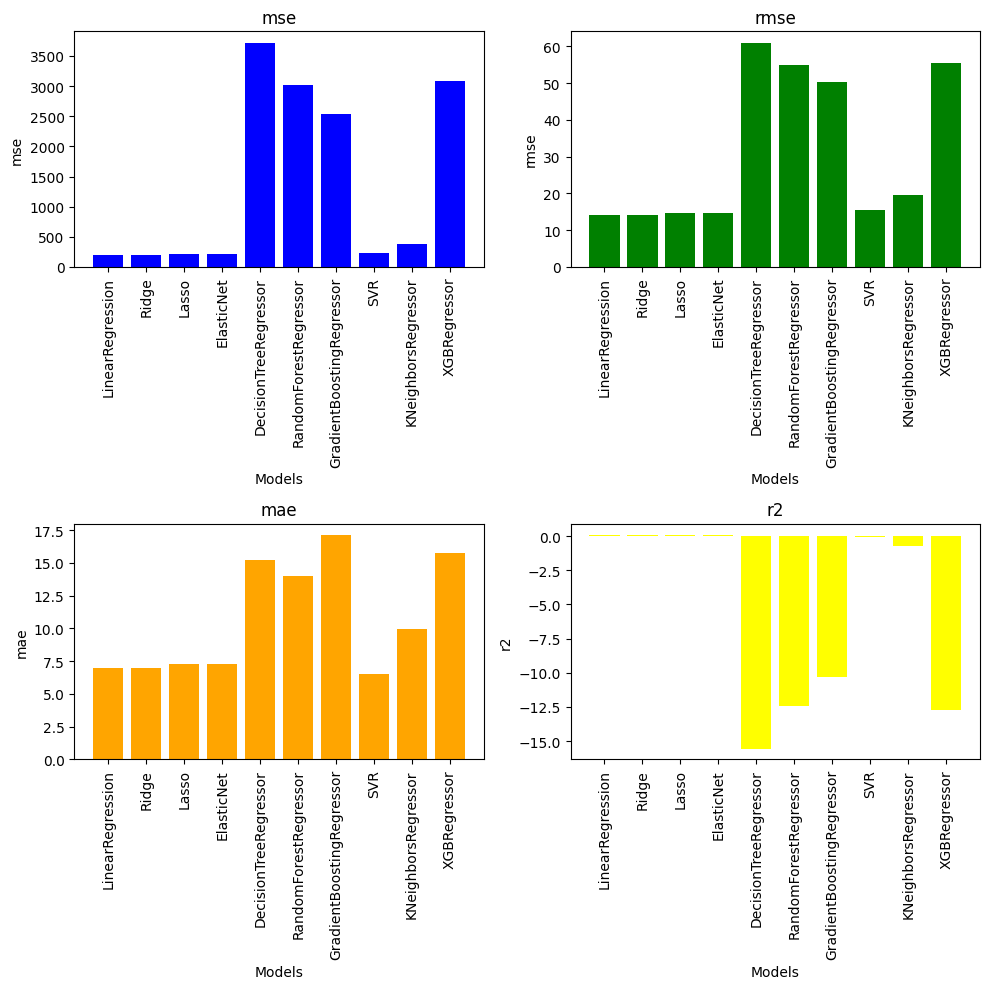

In [91]:
# Visualizing the results with barplots
colors = ["blue","green","orange","yellow"]
plt.figure(figsize=(10, 10))
for index,column in enumerate(results.columns):

    plt.subplot(2,2,index+1)
    plt.bar(results.index, results[column], color=colors[index])
    plt.title(column)
    plt.xticks(rotation=90)
    plt.xlabel("Models")
    plt.ylabel(column)
    plt.tight_layout()


### Inference

1. R² Score:
  * Highest R²: Ridge Regression (0.110074) and Linear Regression (0.109715). Both are positive and similar, indicating a modest level of variance explained by the model.

2. MSE and RMSE:

  * Lowest MSE and RMSE: Ridge Regression (MSE: 200.012302, RMSE: 14.142571) and Linear Regression (MSE: 200.092962, RMSE: 14.145422). These metrics indicate better predictive accuracy.
3. MAE:
  * Lowest MAE: SVR (6.519163), which indicates smaller average errors but needs to be balanced with other metrics due to the negative R².

  > So we can choose Ridge Regression as the overall better performing.

In [92]:
models["Ridge"]

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Start Year', 'Total Deaths', 'Total Affected',
       'magnitude_degree_celcius', 'magnitude_km_square', 'magnitude_richter',
       'magnitude_kph'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('label_encoder',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7a9c6faa3910>))]),
                                                  Index(['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO',
       'Subregion'],
      dtype='object'))])),
                ('model', Ridge())])

In [98]:
models["LinearRegression"]

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Start Year', 'Total Deaths', 'Total Affected',
       'magnitude_degree_celcius', 'magnitude_km_square', 'magnitude_richter',
       'magnitude_kph'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('label_encoder',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7a9c6faa3910>))]),
                                                  Index(['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO',
       'Subregion'],
      dtype='object'))])),
                ('model', LinearRegression())])